In [41]:
import pandas as pd

#### Data Loading

In [42]:
adres = "/workspace/DataMiningFundamentals/beginner_datasets/employee.csv"
df = pd.read_csv(adres)


#### EDA

In [43]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [44]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1
14998,0.37,0.52,2,158,3,0,0,support,low,1


In [45]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [47]:
corr = df.drop(["department","salary"],axis=1).corr()

<Axes: >

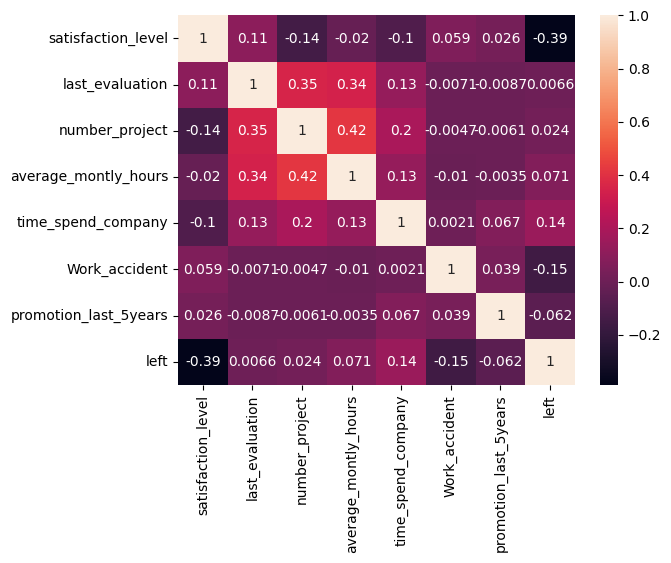

In [48]:
import seaborn as sns
sns.heatmap(corr,annot=True,)

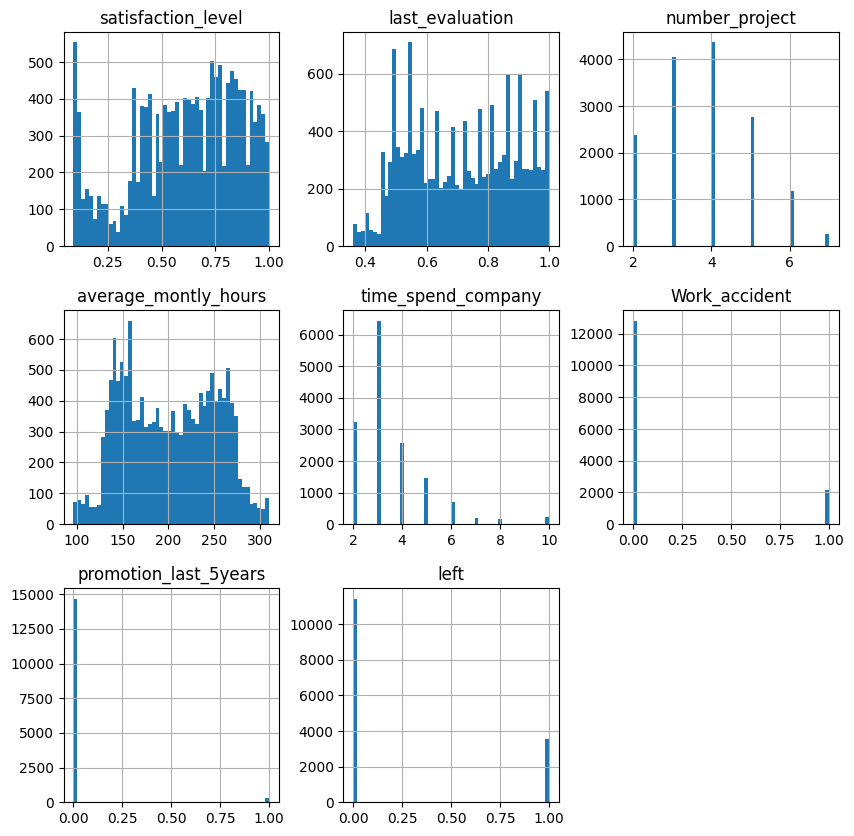

In [49]:
df.drop(["department","salary"],axis=1).hist(bins=50,figsize=(10,10));

In [50]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Handling Missing Data

In [51]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

Boş veri yok bu yüzden işlem yapmadık

#### Encoding

In [52]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [53]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [54]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encode',OneHotEncoder(),[7,8])],remainder="passthrough")
dfEncoded = pd.DataFrame(ct.fit_transform(df))
dfEncoded.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0


#### Label and Features Slicing

In [56]:
y = dfEncoded[20].values
X = dfEncoded.drop(20,axis=1).values

#### Train Test Splitting

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,shuffle=True)

#### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [59]:
y_test

array([1., 0., 1., ..., 1., 1., 1.])

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('RFC',RandomForestClassifier()))
models.append(('DTR',DecisionTreeClassifier()))

In [62]:
sonuclar = []
isimler = []
X = X_train_scaled
y = y_train

In [63]:
from sklearn.model_selection import KFold,cross_val_score
for isim,model in models:
    kfold = KFold(shuffle=True,n_splits=5,random_state=61)
    cv_results = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    sonuclar.append(cv_results)
    isimler.append(isim)
    print(f"{isim} {cv_results.mean()} {cv_results.std()}")

LR 0.793136979398251 0.005859785766058438
KNN 0.9407947828664591 0.002744507553143868
NB 0.6717050343362482 0.011672724005244509
SVC 0.9457731139765823 0.002765447907804363
RFC 0.9890657180969319 0.0011790313733019723
DTR 0.9750200484165802 0.002237651199752797


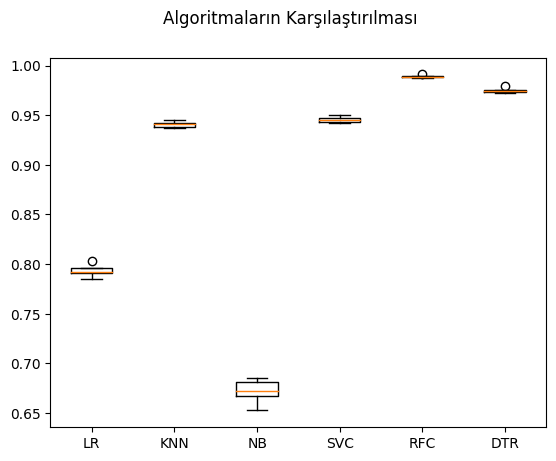

In [64]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle("Algoritmaların Karşılaştırılması")
ax = fig.add_subplot(111)
plt.boxplot(sonuclar)
ax.set_xticklabels(isimler)
plt.show()

#### Soru

In [66]:
# # 0.38,0.53,2,157,3,0,0,sales,low,1
# from sklearn.pipeline import Pipeline
# steps = [StandardScaler(),KNeighborsClassifier()]
# model = Pipeline(steps)
# model.fit()


#### Hyperparameter Tuning

In [71]:
# paramgrid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True],
 'max_depth': [10, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, ],
 'min_samples_split': [2, ],
 'n_estimators': [200, ]}

{'bootstrap': [True],
 'max_depth': [10, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [200]}

In [72]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
model = RandomForestClassifier()
rndSearch = RandomizedSearchCV(model,paramgrid,cv=5,scoring="accuracy")
rndSearch.fit(X,y)

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validat

In [ ]:
rndSearch.best_score_

In [ ]:
rndSearch.best_estimator_

In [ ]:
rndSearch.best_params_

In [ ]:
from sklearn.metrics import confusion_matrix,cross_val_summary

In [ ]:
confusion_matrix(y_test,y_preds)